In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.24.3
!pip install gensim --force-reinstall

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninst

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3.1 Text Preprocessing, Tokenization, and Sequence Padding:

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# --- 1. Download required NLTK resources ---
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/hatevsoffensive_language.csv')

In [ ]:
# --- 2. Text cleaning utility ---
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def process_text(input_text):
    input_text = input_text.lower()
    input_text = re.sub(r'http\S+|www\S+|https\S+', '', input_text)
    input_text = re.sub(r'@\w+|#\w+', '', input_text)
    input_text = re.sub(r'[^a-z\s]', '', input_text)
    tokens = word_tokenize(input_text)
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in STOPWORDS]
    return ' '.join(cleaned_tokens)

# --- 3. Sample data preparation (replace with real dataset) ---
# --- 3. Load real dataset ---
data = pd.read_csv('/content/drive/MyDrive/hatevsoffensive_language.csv', on_bad_lines='skip', header=None, names=['label', 'text'])

# Optionally inspect
print(data.head())

                label                                               text
0               label                                               text
1             neither  !!! RT @mayasolovely: As a woman you shouldn't...
2  offensive language  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
3  offensive language  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
4  offensive language  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...


In [ ]:
# Download the required 'punkt_tab' resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# --- 4. Clean text column ---
data['cleaned_text'] = data['text'].apply(process_text)

In [ ]:
# --- 5. Map labels to numeric values ---
LABEL_MAP = {'hate speec': 0, 'offensive language': 1, 'neither': 2}
data['encoded_label'] = data['label'].map(LABEL_MAP)


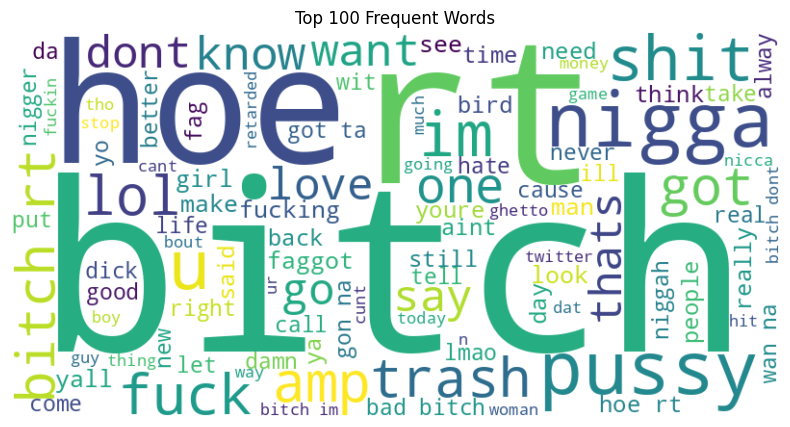

In [ ]:
# --- 6. Visualize top frequent words ---
all_words = ' '.join(data['cleaned_text'])
word_cloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Frequent Words')
plt.show()

In [ ]:
# --- 7. Drop any missing labels ---
data.dropna(subset=['encoded_label'], inplace=True)


# --- 8. Train/Test Split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'],
    data['encoded_label'],
    test_size=0.2,
    random_state=42,
    stratify=data['encoded_label']
)

In [ ]:
# --- 9. Tokenization and Padding ---
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train.values)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

train_lengths = [len(seq) for seq in X_train_seq]
MAX_SEQUENCE_LENGTH = int(np.percentile(train_lengths, 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print("Train Shape:", X_train_pad.shape)
print("Test Shape:", X_test_pad.shape)
X_test_seq = tokenizer.texts_to_sequences(X_test)
train_seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(train_seq_lengths, 95))



Train Shape: (19826, 15)
Test Shape: (4957, 15)


In [ ]:
# --- 11. Print shapes ---
print("X_train_pad shape:", X_train_pad.shape)
print("X_test_pad shape:", X_test_pad.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_pad shape: (19826, 15)
X_test_pad shape: (4957, 15)
y_train shape: (19826,)
y_test shape: (4957,)


#3.2 Model Building and Training:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# --- 10. Common hyperparameters ---
vocab_size = 10000
embedding_dim = 128
num_classes = 3

In [ ]:
# --- 11. Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')


In [ ]:
# --- 12. Define and train models ---

# Model A: Simple RNN
rnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=MAX_SEQUENCE_LENGTH),
    SimpleRNN(64),
    Dense(num_classes, activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_rnn = rnn_model.fit(
    X_train_pad, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8074 - loss: 0.5378

496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8075 - loss: 0.5376 - val_accuracy: 0.8971 - val_loss: 0.2936
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9295 - loss: 0.2197 - val_accuracy: 0.8699 - val_loss: 0.3386
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9629 - loss: 0.1127 - val_accuracy: 0.8891 - val_loss: 0.4037
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9800 - loss: 0.0661 - val_accuracy: 0.8724 - val_loss: 0.4247
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9880 - loss: 0.0411 - val_accuracy: 0.8505 - val_loss: 0.4772
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9884 - loss: 0.0366 - val_accuracy: 0.8553 - val_loss: 0.4898
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9901 - loss: 0.0298 - val_accuracy: 0.8391 - val_loss: 0.5563
Epoch 8/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.

In [ ]:
# Model B: LSTM
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_lstm = lstm_model.fit(
    X_train_pad, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

# Model

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


494/496 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8286 - loss: 0.5117

496/496 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8288 - loss: 0.5110 - val_accuracy: 0.9012 - val_loss: 0.2649
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9154 - loss: 0.2405 - val_accuracy: 0.8991 - val_loss: 0.2710
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9455 - loss: 0.1737 - val_accuracy: 0.9012 - val_loss: 0.2798
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9577 - loss: 0.1320 - val_accuracy: 0.8941 - val_loss: 0.3130
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9700 - loss: 0.0954 - val_accuracy: 0.8780 - val_loss: 0.3912
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9727 - loss: 0.0798 - val_accuracy: 0.8865 - val_loss: 0.4074
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9789 - loss: 0.0617 - val_accuracy: 0.8870 - val_loss: 0.4422
Epoch 8/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9784 - loss: 0.0586 - val_accurac

#3.3 Model Training and Evaluation

In [ ]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
import gensim.downloader as api
# Model C: LSTM + Word2Vec (GloVe Twitter 50D)
glove_twitter = api.load("glove-twitter-50")
embedding_matrix = np.zeros((vocab_size, 50))

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
# Load GloVe embeddings (50D)
word2vec = api.load("glove-twitter-50")

# Create embedding matrix
embedding_dim_word2vec = 50
embedding_matrix = np.zeros((vocab_size, embedding_dim_word2vec))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        if word in word2vec:
            embedding_matrix[i] = word2vec[word]


In [ ]:
# Build Model 3
lstm_w2v_model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim_word2vec,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

lstm_w2v_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model 3
history_lstm_w2v = lstm_w2v_model.fit(
    X_train_pad, y_train,
    epochs=50,

    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8301 - loss: 0.5021 - val_accuracy: 0.8951 - val_loss: 0.2977
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8829 - loss: 0.3192 - val_accuracy: 0.8984 - val_loss: 0.2762
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8920 - loss: 0.2957 - val_accuracy: 0.8984 - val_loss: 0.2681
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8967 - loss: 0.2824 - val_accuracy: 0.8903 - val_loss: 0.2853
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9047 - loss: 0.2628 - val_accuracy: 0.8971 - val_loss: 0.2702
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9049 - loss: 0.2569

496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9049 - loss: 0.2569 - val_accuracy: 0.9097 - val_loss: 0.2524
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9089 - loss: 0.2410 - val_accuracy: 0.9080 - val_loss: 0.2545
Epoch 8/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9159 - loss: 0.2320 - val_accuracy: 0.9065 - val_loss: 0.2560
Epoch 9/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9168 - loss: 0.2154 - val_accuracy: 0.9080 - val_loss: 0.2603
Epoch 10/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9241 - loss: 0.2072 - val_accuracy: 0.9087 - val_loss: 0.2568
Epoch 11/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9256 - loss: 0.2041 - val_accuracy: 0.9047 - val_loss: 0.2737
Epoch 12/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9328 - loss: 0.1879 - val_accuracy: 0.9067 - val_loss: 0.2765
Epoch 13/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9392 - loss: 0.1670 - val_accuracy: 0.906

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# --- 13. Evaluation Function ---
def evaluate(model, x_test, y_true, name="Model"):
    predictions = model.predict(x_test)
    pred_labels = np.argmax(predictions, axis=1)

    acc = accuracy_score(y_true, pred_labels)
    print(f"{name} Accuracy: {acc:.4f}")

    cm = confusion_matrix(y_true, pred_labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Hate', 'Offensive', 'Neither'],
                yticklabels=['Hate', 'Offensive', 'Neither'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    print(classification_report(y_true, pred_labels, target_names=['Hate', 'Offensive', 'Neither']))


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Simple RNN Accuracy: 0.8834


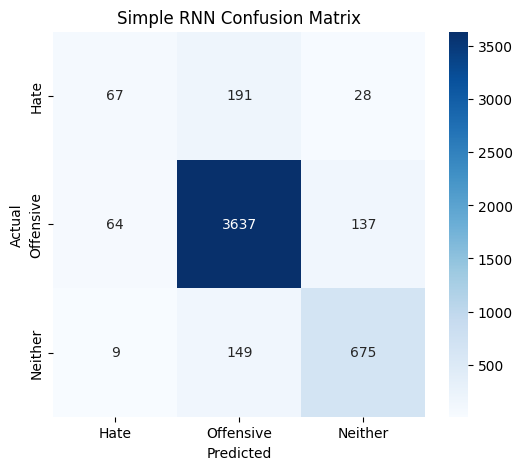

              precision    recall  f1-score   support

        Hate       0.48      0.23      0.31       286
   Offensive       0.91      0.95      0.93      3838
     Neither       0.80      0.81      0.81       833

    accuracy                           0.88      4957
   macro avg       0.73      0.66      0.68      4957
weighted avg       0.87      0.88      0.87      4957

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
LSTM Accuracy: 0.8858


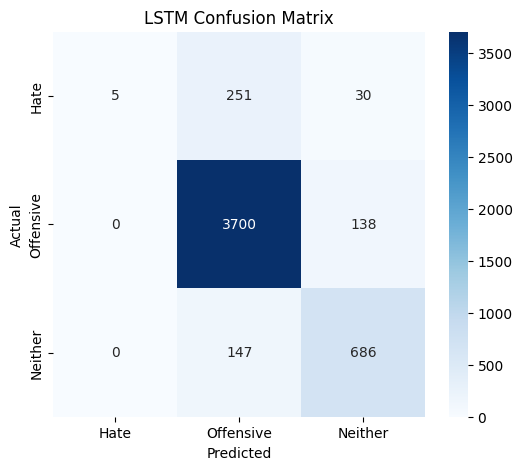

              precision    recall  f1-score   support

        Hate       1.00      0.02      0.03       286
   Offensive       0.90      0.96      0.93      3838
     Neither       0.80      0.82      0.81       833

    accuracy                           0.89      4957
   macro avg       0.90      0.60      0.59      4957
weighted avg       0.89      0.89      0.86      4957

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM + GloVe Accuracy: 0.8957


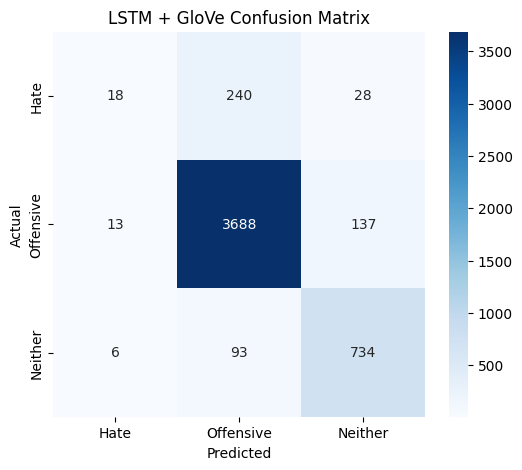

              precision    recall  f1-score   support

        Hate       0.49      0.06      0.11       286
   Offensive       0.92      0.96      0.94      3838
     Neither       0.82      0.88      0.85       833

    accuracy                           0.90      4957
   macro avg       0.74      0.64      0.63      4957
weighted avg       0.88      0.90      0.88      4957



In [ ]:
# --- 14. Evaluate All Models ---
evaluate(rnn_model, X_test_pad, y_test, "Simple RNN")
evaluate(lstm_model, X_test_pad, y_test, "LSTM")
evaluate(lstm_w2v_model, X_test_pad, y_test, "LSTM + GloVe")


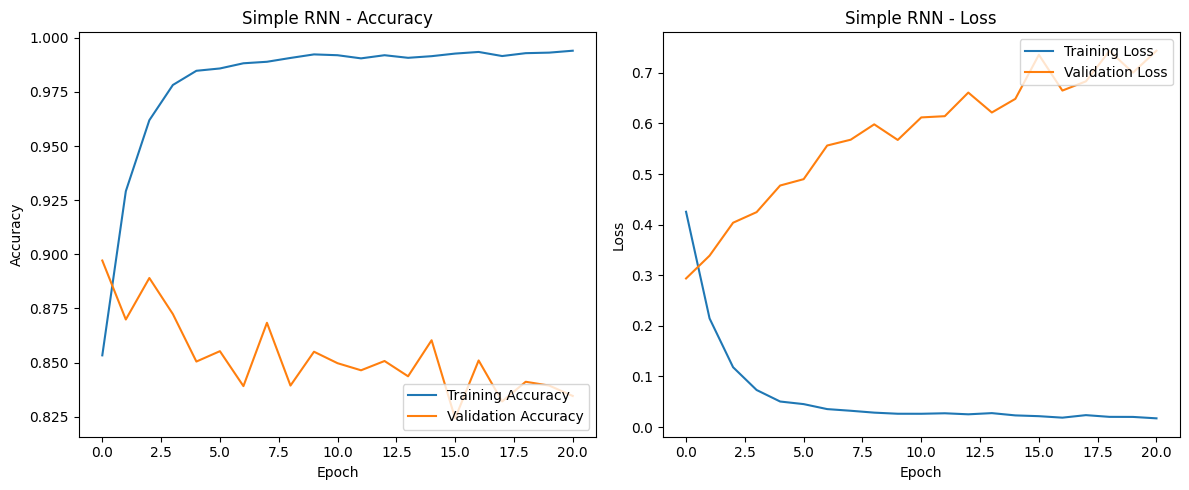

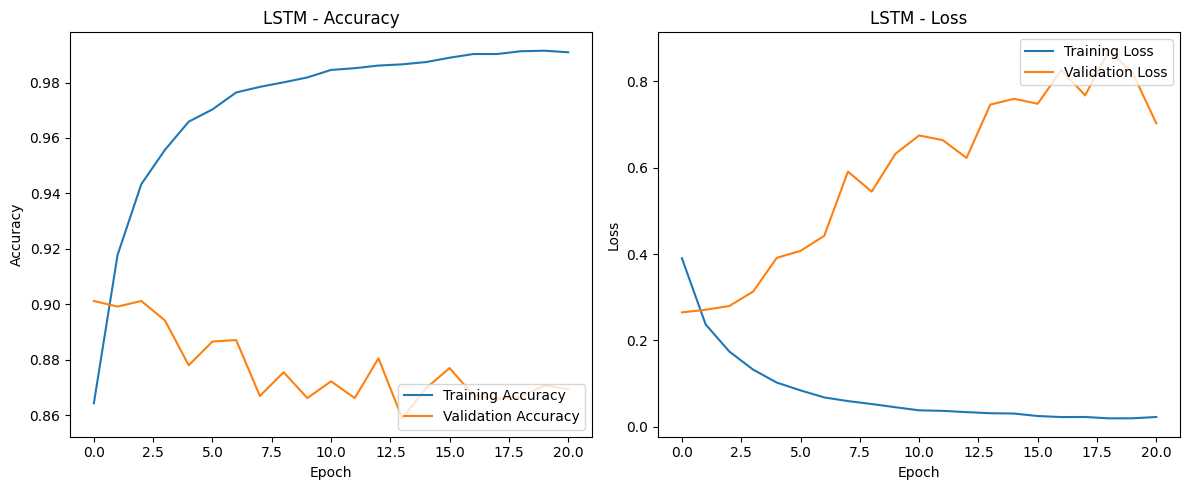

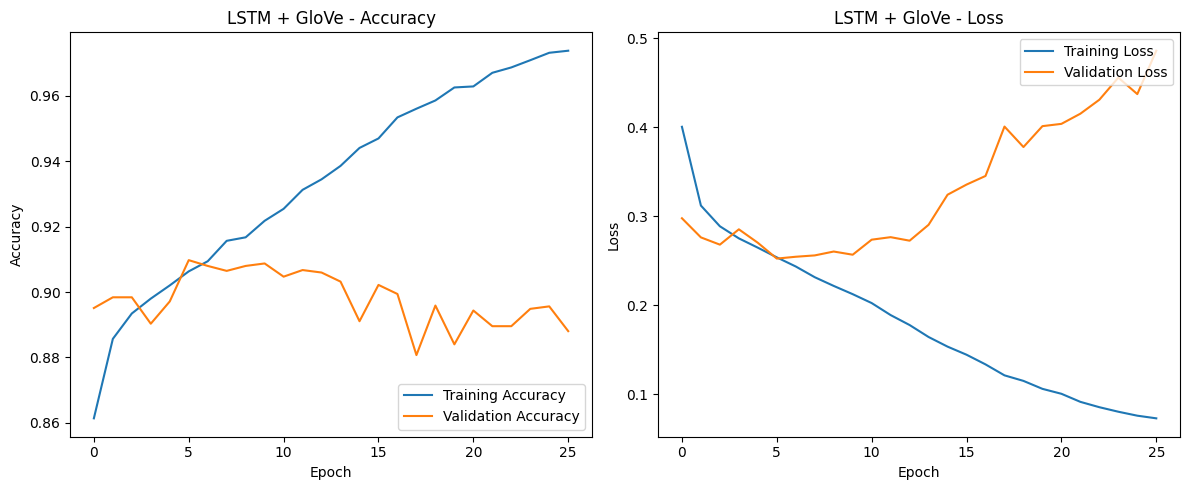

In [ ]:
# --- 15. Plot training history ---
def plot_history(history, title):

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(history_rnn, "Simple RNN")
plot_history(history_lstm, "LSTM")
plot_history(history_lstm_w2v, "LSTM + GloVe")

#3.4 GUI for Real Time Prediction:

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
import re

# --- 16. Load best saved model ---
final_model = load_model('best_model.h5')

# --- Load tokenizer ---
# This should be the tokenizer you used when preparing the training data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['cleaned_text'])  # Fit on your training data

# ---  Text cleaning utility ---
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def process_text(input_text):
    input_text = input_text.lower()
    input_text = re.sub(r'http\S+|www\S+|https\S+', '', input_text)
    input_text = re.sub(r'@\w+|#\w+', '', input_text)
    input_text = re.sub(r'[^a-z\s]', '', input_text)
    tokens = word_tokenize(input_text)
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in STOPWORDS]
    return ' '.join(cleaned_tokens)


In [ ]:
# --- 17. Prediction wrapper function ---
def classify_tweet(text_input):
    processed = process_text(text_input)
    sequence = tokenizer.texts_to_sequences([processed])
    padded = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
    prediction = final_model.predict(padded)
    result = np.argmax(prediction)
    return ['Hate Speech', 'Offensive Language', 'Neither'][result]


In [ ]:
import pandas as pd
import random

# --- Load the dataset ---
# Adjust the filename if needed
df = pd.read_csv('/content/drive/MyDrive/hatevsoffensive_language.csv', on_bad_lines='skip', header=None, names=['label', 'text'])

# --- Filter only "hate speec" rows ---
hate_speech_rows = df[df['label'] == 'hate speec']

# --- Get a random hate speech entry ---
random_index = random.choice(hate_speech_rows.index.tolist())
random_hate_speech = hate_speech_rows.loc[random_index, 'text']

# --- Print result ---
print("Random Hate Speech Example:")
print(random_hate_speech)

Random Hate Speech Example:
I knows y'all white folk only be playin wit me. I colored and I knows my place


In [ ]:
import gradio as gr
# --- 18. Gradio Interface ---
gr.Interface(
    fn=classify_tweet,
    inputs=gr.Textbox(label="Input Tweet", placeholder="Type your tweet here..."),
    outputs=gr.Textbox(label="Prediction"),
    live=True,
    title="Tweet Classifier",
    description="Detect whether a tweet contains hate speech, offensive language, or is neutral."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9e33c5c1757034d0c4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
